# Øvingsforelesning 11 - TDT4110

Øving 8: Plotting og sammensatte programmer

### Oppgave 1

Vi skal telle antall forekomster av alfabetiske og numeriske tegn i en tekststreng. Lag en funksjon som tar inn en tekststreng og returnerer en dictionary med antall forekomster av hvert tegn. Funksjonen skal ignorere mellomrom og skal ikke skille mellom store og små bokstaver.

In [3]:
def count_alphanum(text):
    count = {}

    for ch in text:
        ch = ch.upper()
        if ch.isalnum():
            if ch in count:
                count[ch] += 1
            else:
                count[ch] = 1

    return count

print(count_alphanum("Dette Er en test!"))

{'D': 1, 'E': 5, 'T': 4, 'R': 1, 'N': 1, 'S': 1}


### Oppgave 2

Lag en funksjon som tar inn en dictionary med oversikt over antall forekomster av hvert tegn i en tekststreng, slik som i forrige oppgave, og skriver ut det tegnet som forekommer flest ganger.

In [5]:
# Løsning fra forelesning
def find_max_count(counts):
    highest_count = -1
    highest_key = None

    for ch, count in counts.items():
        if count > highest_count:
            highest_count = count
            highest_key = ch
    
    return highest_key

# En litt interessant løsning som gjør det samme på en linje
def find_max_count(counts):
    # counts.__getitem__ er en funksjon som tilsvarer counts[argument]. Ved å spesifisere
    # denne funksjonen som key til max() vil max() finne det elementet i counts som har
    # høyest verdi (altså finne key som gir høyest counts[key])
    return max(counts, key=counts.__getitem__)

counts = count_alphanum("Dette er også en test")
print(counts)
print(find_max_count(counts))

{'D': 1, 'E': 5, 'T': 4, 'R': 1, 'O': 1, 'G': 1, 'S': 2, 'Å': 1, 'N': 1}
E


# Filhåndtering
Lese fil og konvertere til liste

In [ ]:
with open("numbers.txt", "r") as f:
    numbers = f.readlines()

print(numbers)

# Konvertere til int
for i in range(len(numbers)):
    numbers[i] = int(numbers[i].strip())

print(numbers)

# Unntakshåndtering

Å dele på null utløser unntak

In [ ]:
x = 1 / 0

Vi kan unngå at koden krasjer ved å bruke `try` og `except`. Vi kan spesifisere hvilke feilmeldinger vi vil "fange opp" med `except`

In [ ]:
try:
    x = 1 / 0
except ZeroDivisionError:
    print("Division by zero")

`finally` kjøres uansett

In [ ]:
try:
    x = 1 / 0
except ZeroDivisionError:
    print("Division by zero")
finally:
    print("This is the end")

### Oppagve 3 (Hentet fra ØF6)

Lag en funksjon som spør bruker om et heltall, og spør igjen dersom brukeren ikke skriver inn et heltall. Når brukeren har skrevet inn et heltall, skal funksjonen returnere tallet.

**UTVIDELSE FRA ØF6:** Denne versjonen skal også støtte negative tall.

In [6]:
# Kode fra ØF6
def input_int(prompt="Skriv inn et tall: "):
    while True:
        given = input(prompt)

        if given.isnumeric():
            return int(given)

        print("Skriv inn et gyldig tall!")


tall = input_int()
print(tall)

Skriv inn et gyldig tall!
10


In [13]:
def input_int(prompt="Skriv inn et tall: "):
    while True:
        try:
            return int(input(prompt))
        except ValueError:
            print("Skriv inn et gyldig tall!")

tall = input_int()
print(tall)

Skriv inn et gyldig tall!
1.123


# Værmelding

Vi har fått tak i værmeldingen fra yr.no i et txt-format. Dataen liggger i [yr.txt](yr.txt), og har dette formatet:
```
time	air_pressure_at_sea_level	air_temperature	relative_humidity	wind_from_direction	wind_speed	cloud_area_fraction
2022-10-26T20:00:00Z	1009.2	7.4	88.2	183.1	1.7	99.9
2022-10-26T21:00:00Z	1008.4	6.9	89.9	301.9	0.8	99.9
2022-10-26T22:00:00Z	1007.6	6.8	90.9	189.7	0.6	100
```

Først en rad som beskriver hva de ulike kolonnene inneholder, deretter kommer dataen rad for rad. Hver rad tilsvarer et tidspunkt, og inneholder de meldte verdiene for `air_pressure_at_sea_level`	, `air_temperature` , 	`relative_humidity`	,  `wind_from_direction` 	, `wind_speed` og `cloud_area_fraction`. Første kolonnen inneholder tidspunktet `time`


### Værmelding: Oppgave 1

Vi ønsker å konvertere dataen fra tekstfilen to et mer nyttig format for Python. 

Oppgaven din er å lese inn filen og lage en dictionary `data` som har nøklene `air_pressure_at_sea_level`	, `air_temperature` , 	`relative_humidity`	,  `wind_from_direction` 	, `wind_speed`, `cloud_area_fraction` og `time`.

Verdien som hører til hver nøkkel skal være et `numpy array` med alle verdiene fra tilhørende kolonne i tekstfilen ( i samme rekkefølge som de er nedover i filen).

```python
temp = data['air_temperature']
print(temp) -> [7.4, 6.9, 6.8, ... ]
```


- Hint: Opprett en dictionary først, med tomme lister som verdier for hver nøkkel. Bruk vanlig liste, og konverter til numpy helt til slutt.
- Hint: Verdiene i filen er sepparert med tab, `'\t'`


In [28]:
import numpy as np

with open("yr.txt", "r") as file:
    lines = file.readlines()

headers = lines[0].strip().split("\t")

columns = []
for i in range(len(headers)):
    columns.append([])

for line in lines[1:]:
    parts = line.strip().split("\t")
    for i in range(len(parts)):
        part = parts[i]
        if i != 0:
            part = float(part)

        columns[i].append(part)

data = {}
for i in range(len(headers)):
    header = headers[i]
    values = columns[i]
    data[header] = np.array(values)

In [29]:
# test av koden
temp = data["air_temperature"]
print(temp[:10])  # [ 7.4  6.9  6.8  7.1  7.4  7.7  8.2  8.3  8.4  8.6  ]

[7.4 6.9 6.8 7.1 7.4 7.7 8.2 8.3 8.4 8.6]


## Værmelding oppgave 2

Vi ønsker nå en visualisering av temperaturen.

Bruk matplotlib til å plotte temperatur-dataen fra `data`-dictionarien fra forrige oppgave.

Vi ønsker å ha tidspunktene på x-aksen.

Legg til en label med passende navn.

Resulatet skal se omtrent slik ut (ignorer at x-aksen er uleselig, dette skal vi fikse i neste oppgave):

<img src="yr2.png" style="width: 700px;">


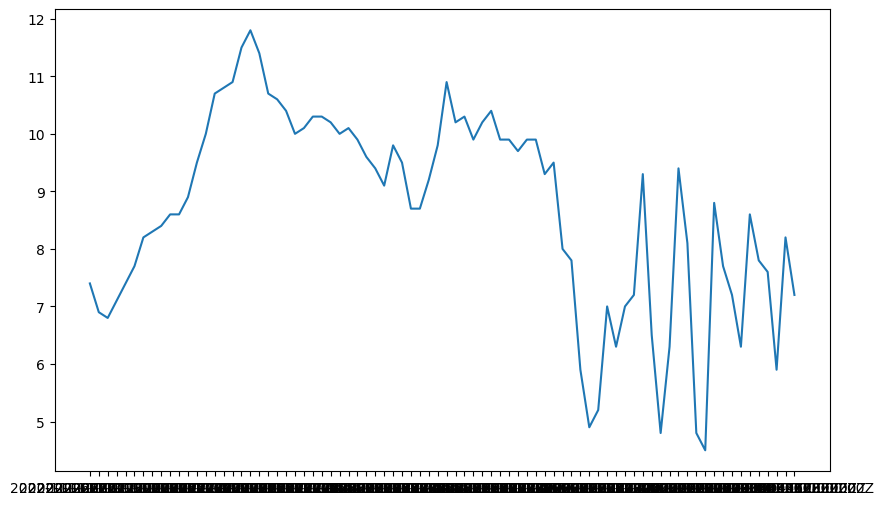

In [31]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

x_axis = data["time"]
y_axis = data["air_temperature"]

ax.plot(x_axis, y_axis)

plt.show()

## Værmelding oppgave 3

Som vi så i forrige oppgave ble x-aksen ikke særlig pen. 

Endre på tidspunkt-verdiene i `data['time']` slik at plottet ser litt bedre ut. Her står dere litt fritt. Lag et nytt plott og sjekk at det ble penere.

- Tips: Bruk `ax.set_xticks(dataDict['time'][::n])` for å endre hvor mange punkter på x-aksen som blir med. `n` bestemmer intervallet.

Her er et eksempel på en mer oversiktlig x-akse:

<img src="yr3.png" style="width: 700px;">

['20:00\n2022-10-26' '20:00\n2022-10-27' '20:00\n2022-10-28'
 '00:00\n2022-11-03']


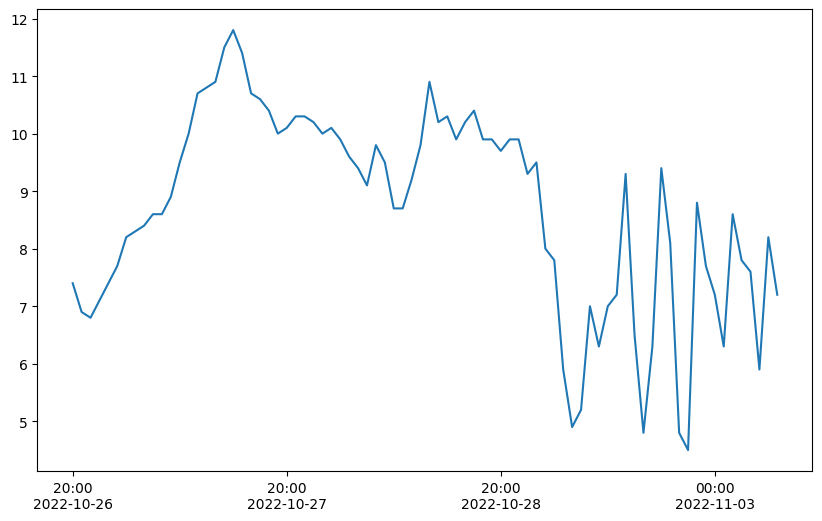

In [41]:
import matplotlib.pyplot as plt

def format_date(datestr):
    date, time = datestr.split("T")
    hours, minutes, seconds = time.split(":")
    return f"{hours}:{minutes}\n{date}"

fig, ax = plt.subplots(figsize=(10, 6))

x_axis = data["time"]
y_axis = data["air_temperature"]

axis_formatter = np.vectorize(format_date)
x_axis = axis_formatter(x_axis)

ax.plot(x_axis, y_axis)
print(x_axis[::24])
ax.set_xticks(x_axis[::24])

plt.show()

## Værmelding oppgave 4

For å gjøre jobben enklere for videre behandling av dataen, ønsker vi å lagre den på et annet format. 

Bruk `numpy.savetxt` for å lagre dataen fra `data`-dictionarien i nye tekstfiler. Lag en fil for hver nøkkel i dictionarien, men navn lik '{nøkkel}.txt' .

- Hint: bruk `fmt = '%.2f'` for tall, og `fmt = '%s'` for strenger


In [44]:
for column, values in data.items():
    if column == "time":
        format = "%s"
    else:
        format = "%.2f"    

    np.savetxt(f"{column}.txt", values, fmt=format)

Test at filene kan lastes inn igjen her:

In [45]:
air_temp = np.loadtxt("air_temperature.txt")
print(air_temp[:10])  # [ 7.4  6.9  6.8  7.1  7.4  7.7  8.2  8.3  8.4  8.6  ]

# Les in flere filer selv:

[7.4 6.9 6.8 7.1 7.4 7.7 8.2 8.3 8.4 8.6]


### Eksempel på bruk av subplots til å lage figurer med flere plots

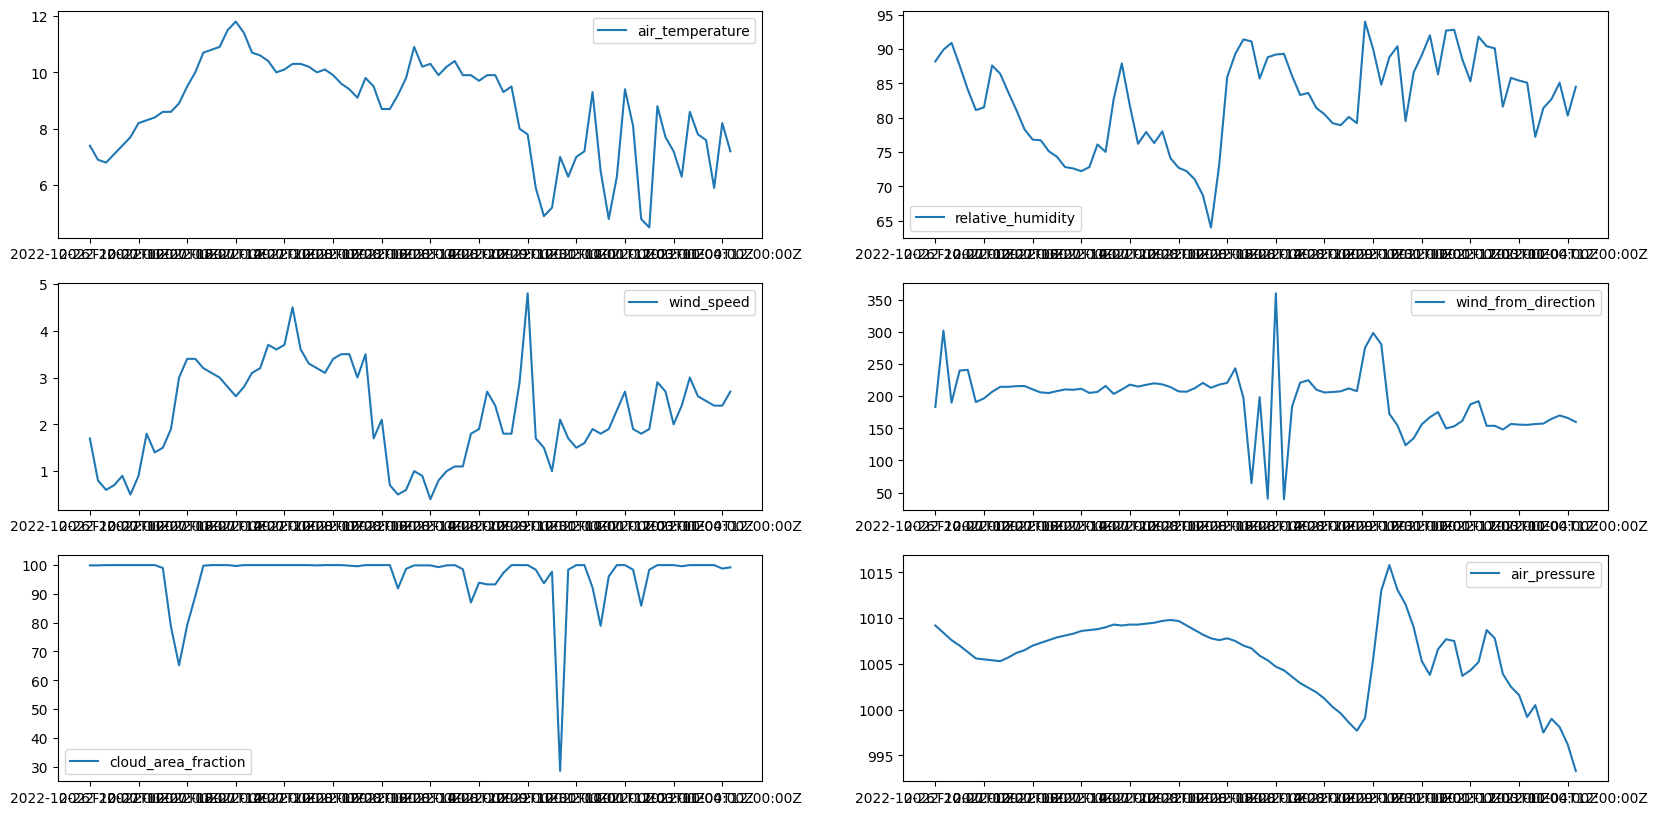

In [46]:
fig, axs = plt.subplots(3, 2, figsize=(20, 10))

axs[0, 0].plot(data["time"], data["air_temperature"], label="air_temperature")
axs[0, 1].plot(data["time"], data["relative_humidity"], label="relative_humidity")
axs[1, 0].plot(data["time"], data["wind_speed"], label="wind_speed")
axs[1, 1].plot(data["time"], data["wind_from_direction"], label="wind_from_direction")
axs[2, 0].plot(data["time"], data["cloud_area_fraction"], label="cloud_area_fraction")
axs[2, 1].plot(data["time"], data["air_pressure_at_sea_level"], label="air_pressure")


for ax in axs.flatten():
    ax.set_xticks(data["time"][::6])
    ax.legend()

plt.show()

# Eksamensoppgaver

### Høst 2016, oppgave 4a

![Oppgave 4a, del 1](bilder/eksamen3.PNG)
![Oppgave 4a, del 2](bilder/eksamen4.PNG)

In [47]:
D = {
    1: "one",
    2: "two",
    3: "three",
    4: "four",
    5: "five",
    6: "six",
    7: "seven",
    8: "eight",
    9: "nine",
    10: "ten",
    11: "eleven",
    12: "twelve",
    13: "thirteen",
    14: "fourteen",
    15: "fifteen",
    16: "sixteen",
    17: "seventeen",
    18: "eighteen",
    19: "nineteen",
    20: "twenty",
    30: "thirty",
    40: "forty",
    50: "fifty",
    60: "sixty",
    70: "seventy",
    80: "eighty",
    90: "ninety",
}
L = [1000000, " million", 1000, " thousand", 1, ""]

In [48]:
def i2_txt(num):
    if num in D:
        return D[num]
    
    ones = num % 10
    tens = num - ones

    one_name = D[ones]
    ten_name = D[tens]
    return f"{ten_name}-{one_name}"

In [51]:
print(i2_txt(71)) # test koden din her
print(i2_txt(75)) # test koden din her
print(i2_txt(44)) # test koden din her
print(i2_txt(32)) # test koden din her
print(i2_txt(1)) # test koden din her
print(i2_txt(15)) # test koden din her
print(i2_txt(98)) # test koden din her

seventy-one
seventy-five
forty-four
thirty-two
one
fifteen
ninety-eight


### Oppgave b
<img src="bilder/eksamen5.PNG" style="width: 700px">

In [ ]:
def i3_txt(num):
    if num <= 99:
        return i2_txt(num)
    
    remainder = num % 100
    hundred_part = num // 100
    if remainder == 0:
        return D[hundred_part] + " hundred"
    
    return D[hundred_part] + " hundred " + i2_txt(remainder)

In [ ]:
i3_txt(971)  # test koden din her

# KOMMENTAR

Siden disse er eksamensoppgaver ligger det allerede ute LF på Blackboard, så jeg lager ikke et ekstra her

### Høst 2015 oppgave 4

#### Oppgave c

Sensor retter eksamen og setter poeng på hver oppgave med en poengsum som går fra og med 0 til og med 10, der 0 er dårligst (0% score) mens 10 er best (100% score). 
Sensur av en eksamen består av en liste med ett tall for hver deloppgave, i samme rekkefølge som de kommer (dvs. 1,2a,2b, osv.) 

Lag funksjonen `compute_score` med inn-parameteren points som er en liste med poengsummer for deloppgavene, og konstanten WEIGHTS. Funksjonen skal regne ut en totalscore i prosent for en eksamen, basert på vektingen av oppgavene. Eksempel på kjøring av funksjonen og hva den returnerer: 

```python 
>>> compute_score([10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10],WEIGHTS) 100.0 
>>> compute_score([10,0,0,0,10,10,10,10,0,0,0,0,0,0,0,0],WEIGHTS) 45.0 
>>> compute_score([5,0,0,0,10,10,10,10,0,0,0,0,0,0,0,0],WEIGHTS) 32.5 
>>> compute_score([4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4],WEIGHTS) 40.0 
```

In [ ]:
WEIGHTS = (25, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5)

In [ ]:
# Skriv koden din her

In [ ]:
# Test koden din her
print(
    compute_score(
        [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10], WEIGHTS
    )
)  # 100

print(
    compute_score([10, 0, 0, 0, 10, 10, 10, 10, 0, 0, 0, 0, 0, 0, 0, 0], WEIGHTS)
)  # 45

print(
    compute_score([5, 0, 0, 0, 10, 10, 10, 10, 0, 0, 0, 0, 0, 0, 0, 0], WEIGHTS)
)  # 32.5

print(compute_score([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], WEIGHTS))  # 40

#### Oppgave 4e

<img src="bilder/15_4e.png" style="width: 700px">

In [ ]:
# Skriv koden din her

In [ ]:
add_candidate(12392, [10, 0, 0, 0, 10, 10, 10, 10, 10, 0, 0, 0, 0, 0, 0, 0], WEIGHTS)
add_candidate(
    33322, [0, 10, 10, 10, 0, 0, 0, 0, 0, 10, 10, 10, 10, 10, 10, 10], WEIGHTS
)

In [ ]:
with open("eksamen.txt", "r") as f:
    print(f.read())

#### Oppgave 4f

<img src="bilder/15_4f.png" style="width: 700px">

In [ ]:
# Skriv koden din her

In [ ]:
table = read_result_file("eksamen.txt")
print(table)